#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Load dataset

In [2]:
marketing_data = pd.read_csv("data/marketing_campaign.csv")

#### Subset for relevant columns

In [3]:
marketing_data = marketing_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                                 'NumWebVisitsMonth']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
marketing_data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [5]:
marketing_data.shape

(2240, 11)

In [6]:
marketing_data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

#### Scale the data

In [7]:
x = marketing_data.values
marketing_data_scaled = StandardScaler().fit_transform(x)

#### Apply PCA to the dataset

In [8]:
pca_marketing = PCA(n_components=6, random_state=1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)

In [9]:
principal_marketing_data = pd.DataFrame(data = principalComponents_marketing
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])

#### Check the explained variance

In [10]:
for i in range(0,len(pca_marketing.explained_variance_ratio_)):
    print("Component ",i ," ",pca_marketing.explained_variance_ratio_[i])

Component  0   0.46456652843636387
Component  1   0.1405246545704046
Component  2   0.07516844380951325
Component  3   0.06144172878159457
Component  4   0.05714631700947585
Component  5   0.047436409149406174


#### Create a Scree Plot

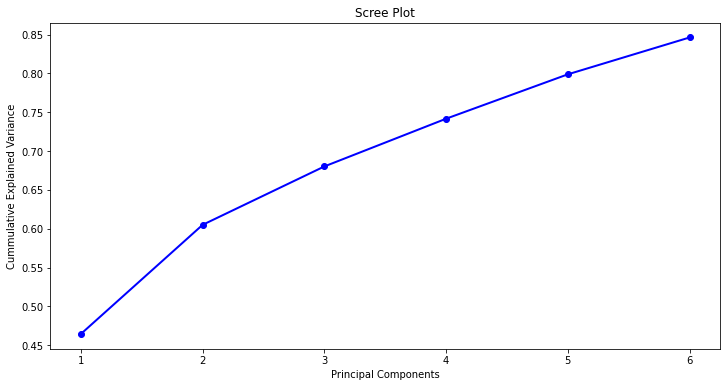

In [11]:
plt.figure(figsize= (12,6))

PC_values = np.arange(pca_marketing.n_components_) + 1
cummulative_variance = np.cumsum(pca_marketing.explained_variance_ratio_)
plt.plot(PC_values, cummulative_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.show()